In [104]:
import pandas as pd
from shapely.geometry import Point
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pylab as pl
from pylab import rcParams
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

import csv

from datetime import datetime
from dateutil.parser import parse

%matplotlib inline

In [94]:
phones = pd.read_csv('Data/phone_bank.csv')
phones.head()

,Date,Total Calls,Total Connects,Total Agree,Total Undecided,Total Volunteer
0,1/26/2017,142,65,40,9,5
1,1/27/2017,134,78,49,8,7
2,1/28/2017,125,66,28,6,7
3,1/29/2017,111,66,28,4,3
4,1/30/2017,121,98,40,14,1


In [18]:
phones['Date'] = pd.to_datetime(phones['Date'])

In [121]:
np.mean(phones['Total Calls'])

149.44594594594594

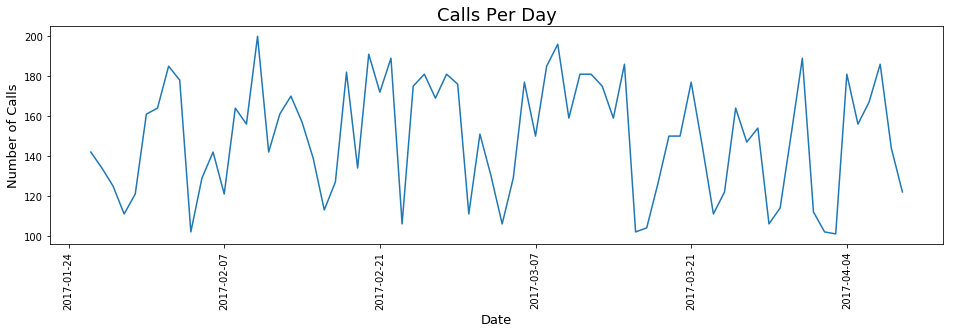

In [19]:
plt.figure(figsize=(16,4))
plt.ylabel('Number of Calls', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.xticks(rotation=90)
plt.title('Calls Per Day', fontsize=18)
plt.plot(phones['Date'], phones['Total Calls'])

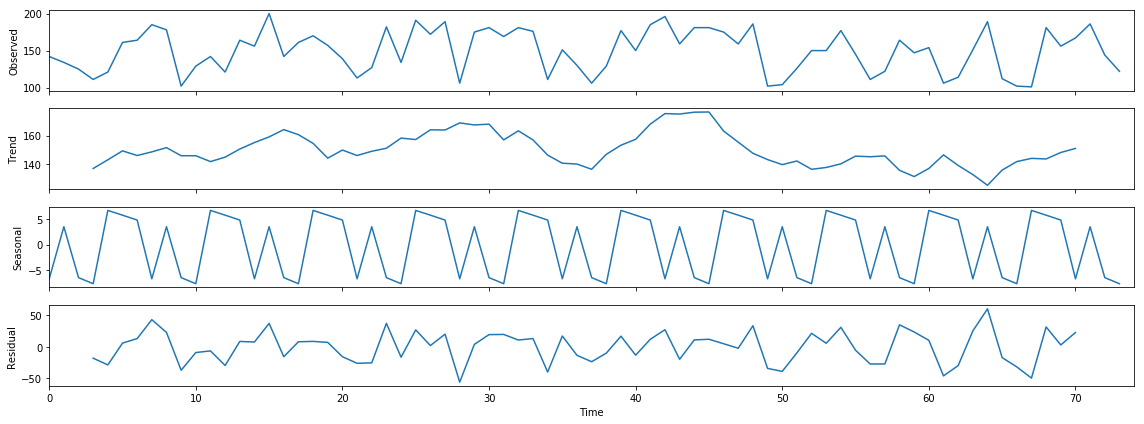

In [26]:
# This assesses the weekly seasonality of the number of calls per day. The third plot shows a trend with three 
# days regularly high, three low, and one hard to read visually.

rcParams['figure.figsize'] = 16, 6

decomposition = sm.tsa.seasonal_decompose(phones['Total Calls'].values, freq=7, model='additive')
fig = decomposition.plot()

In [47]:
# This takes an average number of calls per day of the week.

phones['day_of_week'] = phones['Date'].dt.dayofweek # Monday=0, Sunday=6

grouped_again = phones['Total Calls'].groupby(phones['day_of_week'])
days = pd.DataFrame(grouped_again.mean())
days.rename(columns={'Total Calls': 'ave_calls'}, inplace=True)
days.index = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
days

,ave_calls
Monday,156.200000
Tuesday,156.000000
Wednesday,155.300000
Thursday,143.636364
Friday,154.909091
Saturday,142.272727
Sunday,139.545455


In [32]:
# This calculates the 5-day moving average, and the next cell plots it.

phones['moving_ave'] = phones['Total Calls'].rolling(5).mean()
phones.head(7)

,Date,Total Calls,Total Connects,Total Agree,Total Undecided,Total Volunteer,moving_ave
0,2017-01-26,142,65,40,9,5,NaN
1,2017-01-27,134,78,49,8,7,NaN
2,2017-01-28,125,66,28,6,7,NaN
3,2017-01-29,111,66,28,4,3,NaN
4,2017-01-30,121,98,40,14,1,126.6
5,2017-01-31,161,53,46,13,4,130.4
6,2017-02-01,164,58,42,8,2,136.4


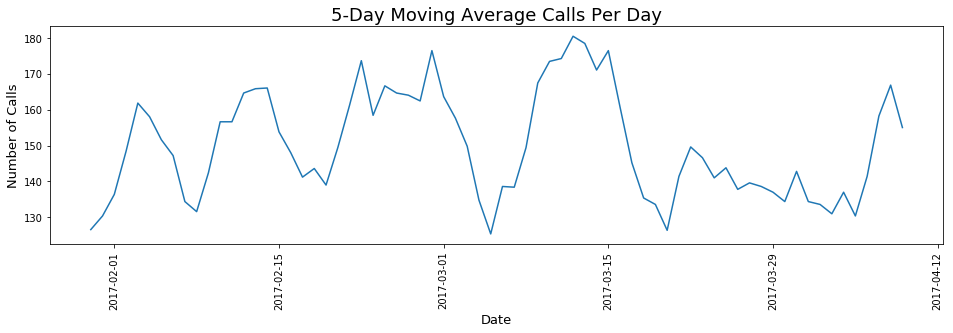

In [30]:
plt.figure(figsize=(16,4))
plt.ylabel('Number of Calls', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.xticks(rotation=90)
plt.title('5-Day Moving Average Calls Per Day', fontsize=18)
plt.plot(phones['Date'], phones['moving_ave'])

In [48]:
# Summing the data from all 74 days and calculating conversion rates in the cells below.

calls = phones['Total Calls'].sum()
connects = phones['Total Connects'].sum()
agree = phones['Total Agree'].sum()
undecided = phones['Total Undecided'].sum()
volunteer = phones['Total Volunteer'].sum()
print(calls, connects, agree, undecided, volunteer)

11059 5355 2712 566 373


In [54]:
print(connects/calls*100, "percent of calls are answered.")

48.42209964734605 percent of calls are answered.


In [61]:
print(agree/connects*100, "percent of people reached support charter schools.")

50.64425770308123 percent of people reached support charter schools.


In [62]:
print((1-(agree+undecided)/connects)*100, "percent of people reached oppose charter schools.")

38.78618113912231 percent of people reached oppose charter schools.


In [63]:
print(volunteer/connects*100, "percent of people reached agree to volunteer.")

6.965452847805789 percent of people reached agree to volunteer.


In [75]:
# Calculating moving average percent who agree. This is imperfect since it doesn't take into account the volume
# per day. The change in agree percentage will be more accurately calculated below these plots.

phones['%_agree'] = phones['Total Agree'] / phones['Total Connects']
phones['%_agree_moving_ave'] = phones['%_agree'].rolling(20).mean()

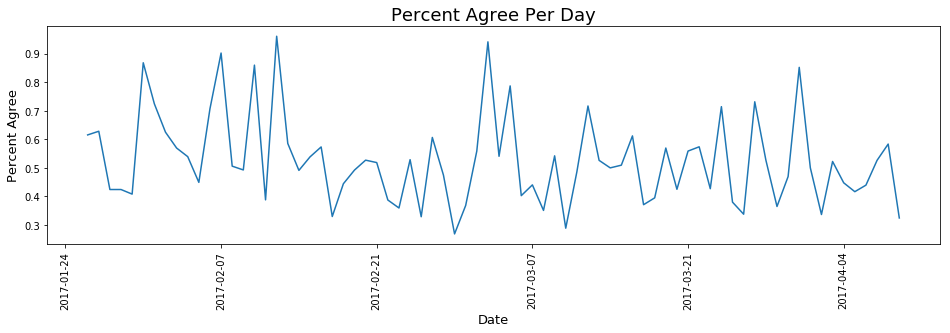

In [72]:
plt.figure(figsize=(16,4))
plt.ylabel('Percent Agree', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.xticks(rotation=90)
plt.title('Percent Agree Per Day', fontsize=18)
plt.plot(phones['Date'], phones['%_agree'])

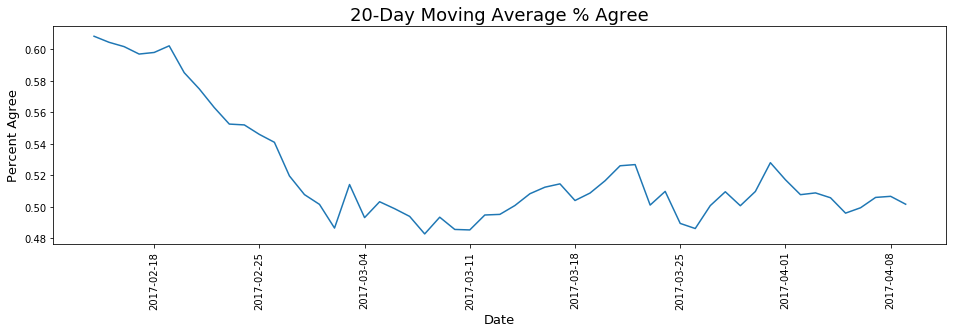

In [70]:
plt.figure(figsize=(16,4))
plt.ylabel('Percent Agree', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.xticks(rotation=90)
plt.title('20-Day Moving Average % Agree', fontsize=18)
plt.plot(phones['Date'], phones['%_agree_moving_ave'])

In [84]:
# The following cells accurately show the percentage of reached voters who agree and how this has changed from month
# to month.

monthly_connects = phones.resample('m', on='Date')['Total Connects'].sum().dropna().tolist()
monthly_agree = phones.resample('m', on='Date')['Total Agree'].sum().dropna().tolist()

In [113]:
monthly = pd.DataFrame({'monthly_connects':monthly_connects, 'monthly_agree':monthly_agree})
monthly['%_agree'] = monthly['monthly_agree'] / monthly['monthly_connects']
monthly.index = ['January', 'February', 'March', 'April']
monthly['month'] = ['January', 'February', 'March', 'April']
monthly

,monthly_agree,monthly_connects,%_agree,month
January,231,426,0.542254,January
February,1044,2008,0.519920,February
March,1147,2272,0.504842,March
April,290,649,0.446841,April


Text(0,0.5,'Percent Agree')

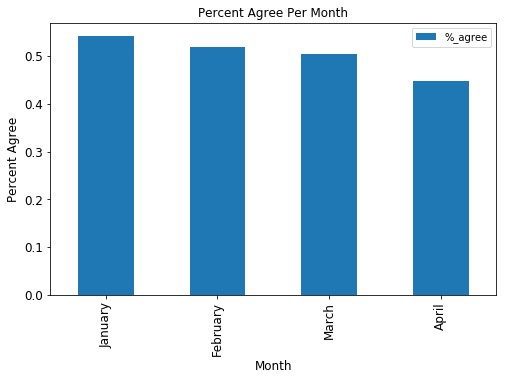

In [119]:
ax = monthly[['%_agree', 'month']].plot(kind='bar', title ="Percent Agree Per Month", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Percent Agree", fontsize=12)